# Laboratório 2: Limpeza e Análise Exploratória

Bem-vindo ao Laboratório 2! Esta semana você praticará alguns métodos DataFrame para limpeza e análise exploratória de dados.

Os tópicos deste laboratório são abordados em [BPD 6](https://notes.dsc10.com/01-getting_started/functions-defining.html), [Visualização 1](https://flaviovdf.io/icd-bradesco/07-Viz/) e [Visualização 2](https://flaviovdf.io/icd-bradesco/08-MaisViz/).

Use sua criatividade: Analise os datasets e formule perguntas que vão além daquelas solicitadas.

**Caso esteja usando collab, lembre-se, para fins didáticos, de desabilitar a assistência por AI nas configurações**

**Não use loops for em nenhuma pergunta deste laboratório.** Se você não sabe o que é um loop for, não se preocupe: ainda não abordamos isso. Mas se você sabe o que eles são e está se perguntando por que não é correto usá-los, é porque os loops em Python são lentos e os loops em arrays e DataFrames geralmente devem ser evitados.

Primeiro, configure os testes e importações executando a célula abaixo.

In [86]:
import numpy as np
import pandas as pd

# Aqui configuramos a biblioteca de visualização de dados.
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

##1. **Notas de Alunos** 🎓

Vamos agora realizar um pouco dos passos da análise exploratória de dados. Esse tipo de análise muitas vezes é feita como um preprocessamento dos dados, a fim de que padrões simples sejam capturados antes que um processamento mais complexo seja implementado. Em particular, vamos passar pelos passos de:

    1) Carregamento dos dados
    2) Limpeza dos dados
    3) Análise exploratória com operações sobre o dataframe e estatísticas básicas

###**1) Carregamento dos dados.**
Em muitos cenários do mundo real, os dados são carregados de fontes como arquivos. Vamos substituir o DataFrame das notas dos alunos pelo conteúdo de um arquivo de texto.

In [87]:
course_df = pd.read_csv('https://raw.githubusercontent.com/flaviovdf/icd-bradesco/refs/heads/main/labs/lab02/data/grades.csv',
                 sep=',',
                 header=0)
course_df.head()

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


O método read_csv do DataFrame é usado para carregar dados de arquivos de texto. Como você pode ver no código de exemplo, você pode especificar opções como o delimitador de coluna e qual linha (se houver) contém cabeçalhos de coluna (neste caso, o delimitador é uma vírgula e a primeira linha contém os nomes das colunas).

Além do mais, a chamada head imprime as primeiras cinco linhas da nossa tabela.


###**2) Limpeza / Dados faltantes**


Um dos problemas mais comuns com os quais os cientistas de dados precisam lidar são dados incompletos ou ausentes. Como podemos saber que o DataFrame contém valores ausentes? Você pode usar o método isnull para tal tarefa.

In [88]:
course_df.isnull()

,Name,StudyHours,Grade
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


Obseve como a última linha falta com o número de horas estudadas. Nas dúas últimas, faltam as notas. Caso você deseja saber a quantidade de dados faltantes, basta somar os Trues da tabela acima. Aqui é importante saber que Python tratta True de forma similar ao número 1. Portanto, basta você somar a tabela inteira para pegar tal quantidade de dados faltantes.

In [89]:
course_df.isnull().sum()

,0
Name,0
StudyHours,1
Grade,2


Lembrando que a chamada iloc pega uma linha com base no número da mesma, vamos observar a última linha da tabela de dados. Observe como os valores faltantes viram NaNs. Além do mais, lembre-se que podemos indexar de trás para frente com o -1. -1 é a última linha, -2 a penúltima. Para entender a lógica, em um vetor de tamanho n, n-1 é o último elemento. Indexar -1 indica n-1.

In [90]:
course_df.iloc[-1] # última linha do DataFrame

,23
Name,Ted
StudyHours,NaN
Grade,NaN


In [91]:
course_df.iloc[-2] # penúltima linha do DataFrame

,22
Name,Bill
StudyHours,8.0
Grade,NaN


Agora que encontramos os valores faltantes, o que podemos fazer a respeito deles?

**fillna**

Uma abordagem comum é imputar valores de substituição. Por exemplo, se o número de horas de estudo está faltando, podemos simplesmente supor que o aluno estudou por um período médio de tempo e substituir o valor faltante com as horas de estudo médias. Para fazer isso, podemos usar o método fillna, como este:

In [92]:
course_df['StudyHours'].fillna(course_df['StudyHours'].mean())

,StudyHours
0,10.000000
1,11.500000
2,9.000000
3,16.000000
4,9.250000
5,1.000000
6,11.500000
7,9.000000
8,8.500000
9,14.500000


Observe que a última linha foi alterada! Porém, o DataFrame original não foi.

In [93]:
course_df.iloc[-1]

,23
Name,Ted
StudyHours,NaN
Grade,NaN


Para alterar, podemos trocar a coluna. Abaixo faço tal operação em uma cópia dos dados. Realizei tal escolha apenas para não mudar a tabela original.

In [94]:
df_novo = course_df.copy() # criar uma cópia apenas para o exemplo
df_novo['StudyHours'] = df_novo['StudyHours'].fillna(df_novo['StudyHours'].mean())
df_novo.iloc[-1]

,23
Name,Ted
StudyHours,10.413043
Grade,NaN


Observe como não mudamos nada das notas. O fillna pode receber uma série indexada para alterar várias colunas. Primeiramente, observe como a chamada mean pega a média de todas as colunas.

In [95]:
course_df.mean(numeric_only=True)

,0
StudyHours,10.413043
Grade,49.181818


O fillna então vai pegar o índice dessa série, o nome de cada coluna, e utilizar como chave para quais colunas imputar. O valor da série indica o valor que será imputado. Observe como os novos dados abaixo estão sem NaNs.

In [96]:
df_novo = course_df.fillna(course_df.mean(numeric_only=True))
df_novo

,Name,StudyHours,Grade
0,Dan,10.000000,50.000000
1,Joann,11.500000,50.000000
2,Pedro,9.000000,47.000000
3,Rosie,16.000000,97.000000
4,Ethan,9.250000,49.000000
5,Vicky,1.000000,3.000000
6,Frederic,11.500000,53.000000
7,Jimmie,9.000000,42.000000
8,Rhonda,8.500000,26.000000
9,Giovanni,14.500000,74.000000


In [97]:
df_novo.isnull().sum()

,0
Name,0
StudyHours,0
Grade,0


**dropna**

Outra opção é simplesmente remover todas as linhas com dados faltantes. Para tal, fazemos uso da chamada dropna.

In [98]:
df_novo = course_df.dropna()
df_novo.shape

(22, 3)

In [99]:
course_df.shape

(24, 3)

Observe como o novo DataFrame tem duas linhas a menos do que o anterior. A escolha de como limpar dados faltantes depende do tipo de análise que você vai realizar. Aqui, vamos seguir com o drop no df.

In [100]:
course_df.dropna(inplace=True) # on inplace=True altera o dataframe atual, não retorna um novo
course_df

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


### **3) Análise Exploratória**

#### **Operações sobre o DataFrame:**

Podemos indexar DataFrames usando vetores de booleanos. Tais vetores podem ser obtidos utilizado operações de comparação em séries do dataframe. Por exemplo, para pegar as notas de Skye podemos primeiramente achar a discente nos dados:

In [101]:
course_df['Name'] == 'Skye'

,Name
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


Observe como acima temos uma entrada verdadeira. Esta, é justamente a linha onde temos o nome Skye. Ao indexar o DataFrame com tal linha, pegamos a nota da discente.

In [102]:
idx = course_df['Name'] == 'Skye'
course_df[idx]

,Name,StudyHours,Grade
19,Skye,12.0,52.0


Outra forma de fazer a mesma operação é com o método query. O query faz consultados usando uma línguagem similar aos bancos de dados. Um exemplo:

In [103]:
course_df.query('Name == "Skye"')

,Name,StudyHours,Grade
19,Skye,12.0,52.0


Podemos também pegar todas as notas acima de 60. Ou seja, os alunos aprovados.

In [104]:
course_df.query('Grade >= 60')

,Name,StudyHours,Grade
3,Rosie,16.00,97.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


Como também os alunos que passaram estudando relativamente pouco. No nosso caso, vamos focar em alunos que estudaram menos do que 14horas.

In [105]:
course_df.query('Grade >= 60 and StudyHours <= 14')

,Name,StudyHours,Grade
11,Rajab,13.75,62.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


**Pergunta 1.1**. Usando o dataframe explorado acima, retorne uma copia do dataframe que possua apenas linhas cujos alunos foram reprovados mas estudaram mais que 15 horas.

In [106]:
course_df.query('StudyHours >= 15.00')

,Name,StudyHours,Grade
3,Rosie,16.0,97.0
10,Francesca,15.5,82.0
14,Jenny,15.5,70.0


#### **Estatísticas**

Existem vários valores estatísticos que podem servir ao fim de descrever os dados em análise. Podemos obter alguns desses valores de forma simples através do dataframe.

In [107]:
course_df.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


**Medidas de tendência central**

Para entender melhor a distribuição, podemos examinar as chamadas medidas de tendência central; que é uma maneira sofisticada de descrever estatísticas que representam o "meio" dos dados. O objetivo disso é tentar encontrar um valor "típico". Maneiras comuns de definir o meio dos dados incluem:

    A média: uma média simples baseada na soma de todos os valores no conjunto de amostra e, em seguida, na divisão do total pelo número de amostras.
    A mediana: o valor no meio do intervalo de todos os valores de amostra.
    A moda: o valor de ocorrência mais comum no conjunto de amostra.

Vamos calcular esses valores, junto com os valores mínimo e máximo para comparação, e mostrá-los no histograma. Primeiramente, observe como podemos pegar tais valores direto do DataFrame.

In [108]:
data = course_df['Grade']

data_mean = data.mean()
data_median = data.median()
data_mode = data.mode()[0] # caso houver mais que uma moda, obtem o primeiro valor

print('\nGrade:\n - Mean: {:.2f}\n - Median: {:.2f}\n - Mode: {:.2f}\n'.format(data_mean, data_median, data_mode))


Grade:
 - Mean: 49.18
 - Median: 49.50
 - Mode: 50.00



Podemos também obter essas estatísticas para todas as colunas numéricas do dataframe

In [109]:
course_df.mean(numeric_only=True)

,0
StudyHours,10.522727
Grade,49.181818


**Pergunta 1.2.** Usando o dataframe do curso, retorne uma cópia do dataframe que possua apenas linhas com alunos com nota acima da média de notas.

In [110]:
# Resposta aqui ...
course_df.query('Grade >= 49.18')


,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
3,Rosie,16.00,97.0
6,Frederic,11.50,53.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
19,Skye,12.00,52.0
20,Daniel,12.50,63.0


**Pergunta 1.3.** Agora, obtenha a média da nota dos alunos com tempo de estudo de pelo menos 10 horas. Obtenha também a média daqueles com menos que 10 horas.

In [111]:
# Resposta aqui ...
mais_10_horas = course_df.query('StudyHours >= 10.00')
menos_10_horas = course_df.query('StudyHours < 10.00')
mean_mais = mais_10_horas['Grade'].mean()
mean_menos = menos_10_horas['Grade'].mean()


print(
    f"Média dos alunos com pelo menos 10 horas de estudo:\n{mean_mais:.2f}\n\n"
    f"Média dos alunos com menos de 10 horas de estudo:\n{mean_menos:.2f}"
)

Média dos alunos com pelo menos 10 horas de estudo:
63.75

Média dos alunos com menos de 10 horas de estudo:
31.70


**Medidas de variância**

Portanto, agora temos uma boa ideia de onde estão as estatísticas centrais dos dados. No entanto, há outro aspecto das distribuições que devemos examinar: quanta variabilidade existe nos dados?

As estatísticas típicas que medem a variabilidade nos dados incluem:

    Intervalo: a diferença entre o máximo e o mínimo. Não há função incorporada para isso, mas é fácil calcular usando as funções mín e máx.
    Variância: a média da diferença quadrática da média. Você pode usar a função var integrada para encontrar isso.
    Desvio padrão: a raiz quadrada da variância. Você pode usar a função std embutida para encontrar isso.



Similarmente, podemos obter essas estatísticas através do dataframe

In [112]:
col_name = 'Grade'
col_series = course_df[col_name]

rng = col_series.max() - col_series.min()
var = col_series.var(ddof=1)
std = col_series.std(ddof=1)

print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74



**Quartis**

Na estatística descritiva, um quartil é qualquer um dos três valores que divide o conjunto ordenado de dados em quatro partes iguais, e assim cada parte representa 1/4 da amostra ou população.

Assim, no caso duma amostra ordenada,

    primeiro quartil (designado por Q1/4) = quartil inferior = é o valor aos 25% da amostra ordenada = 25º percentil
    segundo quartil (designado por Q2/4) = mediana = é o valor até ao qual se encontra 50% da amostra ordenada = 50º percentil, ou 5º decil.
    terceiro quartil (designado por Q3/4) = quartil superior = valor a partir do qual se encontram 25% dos valores mais elevados = valor aos 75% da amostra ordenada = 75º percentil
    à diferença entre os quartis superior e inferior chama-se amplitude inter-quartil.

Observe como os quartis estão presentes na sumarização dos dados. São as linhas 25%, 50% (mediana) e 75%. Podemos também obter esses valores através do método quantile


In [113]:
course_df.quantile([0.25, 0.5, 0.75], numeric_only=True)

,StudyHours,Grade
0.25,9.000,36.25
0.50,10.000,49.50
0.75,12.375,62.75


**Comparando Dados**

Por fim, vamos comparar o tempo de estudo entre os alunos que passaram ou não. Para tal, vamos definir qualquer nota >= 60 como sendo uma aprovação. Depois disso, vamos alterar o DataFrame para conter tal informação.

Primeiro criando a série com tal informação.

In [114]:
passed = course_df['Grade'] >= 60
passed

,Grade
0,False
1,False
2,False
3,True
4,False
5,False
6,False
7,False
8,False
9,True


Agora, alterando o DataFrame.

In [115]:
course_df['Passed'] = passed
course_df

,Name,StudyHours,Grade,Passed
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


Agora, vamos entender o tempo de dedicação dos alunos que passam e dos que não passam. Podemos fazer uso do Boxplot para tal comparativo. Na estatística descritiva, o boxplot é uma ferramenta gráfica para representar a variação de dados observados de uma variável numérica por meio de quartis.

A "caixa" mostra o primeiro e terceiro quartil. A linha no meio mostra o segundo, a mediana. Portanto, a caixa se estende dos valores dos quartil de Q1 a Q3 dos dados, com uma linha na mediana (Q2). Os bigodes se estendem das bordas da caixa para mostrar a extensão dos dados. Por padrão, eles estendem não mais do que 1,5 * IQR (IQR = Q3 - Q1) das bordas da caixa, terminando no ponto de dados mais distante dentro desse intervalo. Valores fora desta faix são plotados como pontos separados.


<Axes: title={'center': 'StudyHours'}, xlabel='Passed'>

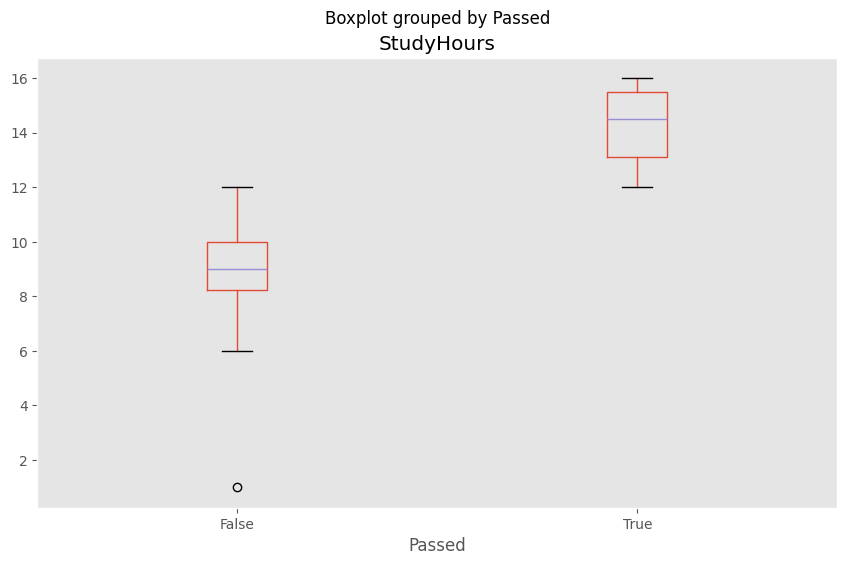

In [116]:
course_df.boxplot(column='StudyHours', by='Passed', grid=False)

Observe que, como esperado, alunos que passam estudam mais. Os quartis, portanto a distribuição dos dados, são mais altos. Para observar os valores podemos fazer um groupby.

Abaixo eu agrupo os dados por passou ou não. Depois, pego as horas de estudo. Por fim, observo as estatíticas.

In [117]:
course_df.groupby('Passed')['StudyHours'].describe()

,count,mean,std,min,25%,50%,75%,max
Passed,,,,,,,,
False,15.0,8.783333,2.647213,1.0,8.250,9.0,10.0,12.0
True,7.0,14.250000,1.561249,12.0,13.125,14.5,15.5,16.0


Observe como 25% (primeiro quartil) dos alunos que não passam, estudam menos do que 8,25 horas. Para os que passam, este valor é de 13,125. Agora pense no complemento dos 25%. 75% dos alunos que passam estudam pelo menos 13h! Isso é bem maior do que as 8h dos que não passam!

**Correlacionando Dados**

Por fim, podemos correlacionar o tempo de estudo com a nota.

Text(0, 0.5, 'Grade')

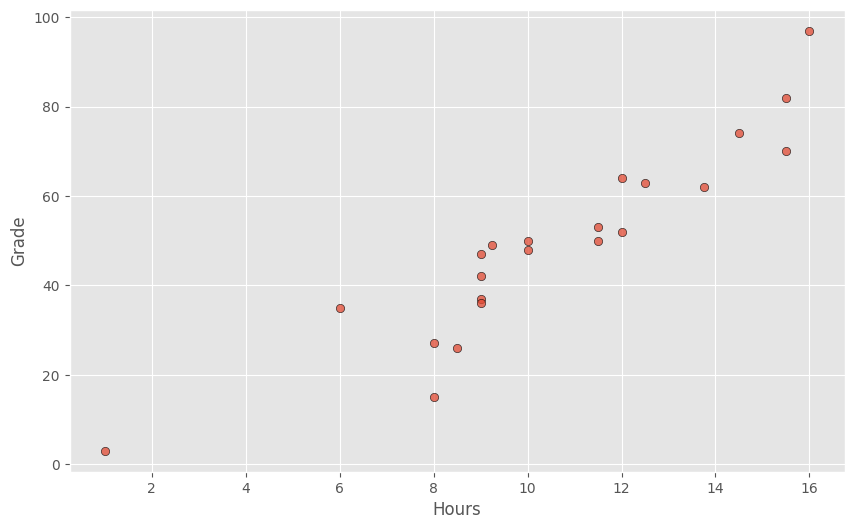

In [118]:
plt.scatter(course_df.StudyHours, course_df.Grade, edgecolor='k', alpha=0.75)
plt.xlabel('Hours')
plt.ylabel('Grade')

###**Hora de praticar (Flight Data)**

Eu espero que o tutorial acima tenha sido uma boa revisão de análise exploratória de dados. Agora é com você! Será sua responsabilidade explorar um conjunto de dados do mundo real contendo dados de voos do Departamento de Transporte dos EUA.

Vamos começar carregando os dados.


In [119]:
flight_df = pd.read_csv('https://raw.githubusercontent.com/flaviovdf/icd-bradesco/refs/heads/main/labs/lab02/data/flights.csv')

O conjunto de dados contém observações de voos domésticos dos EUA em 2013 e consiste nos seguintes campos:

    Ano: o ano do voo (todos os registros são de 2013)
    Mês: o mês do voo
    Dia do mês: o dia do mês em que o voo partiu
    DayOfWeek: o dia da semana em que o voo partiu - de 1 (segunda-feira) a 7 (domingo)
    Transportadora: a abreviatura de duas letras da companhia aérea.
    OriginAirportID: Um identificador numérico exclusivo para o aeroporto de partida
    Nome do aeroporto de origem: o nome completo do aeroporto de partida
    OriginCity: a cidade do aeroporto de partida
    Estado de origem: o estado do aeroporto de partida
    DestAirportID: Um identificador numérico único para o aeroporto de destino
    DestAirportName: o nome completo do aeroporto de destino
    DestCity: a cidade do aeroporto de destino
    DestState: o estado do aeroporto de destino
    CRSDepTime: a hora de partida programada
    DepDelay: o número de minutos de atraso na partida (o voo que saiu antes do horário tem um valor negativo)
    DelDelay15: Um indicador binário de que a partida foi atrasada por mais de 15 minutos (e, portanto, considerada "atrasada")
    CRSArrTime: a hora de chegada programada
    ArrDelay: o número de minutos de atraso na chegada (o voo que chegou antes do horário tem um valor negativo)
    ArrDelay15: Um indicador binário de que a chegada foi atrasada em mais de 15 minutos (e, portanto, considerada "atrasada")
    Cancelado: um indicador binário de que o voo foi cancelado

In [120]:
flight_df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


**Exercício 1.1** Conte a quantidade de dados faltantes na tabela.

In [121]:
# Responda aqui ...
flight_df.isnull().sum()

,0
Year,0
Month,0
DayofMonth,0
DayOfWeek,0
Carrier,0
OriginAirportID,0
OriginAirportName,0
OriginCity,0
OriginState,0
DestAirportID,0


**Exercício 1.2** Crie um novo dataframe sem as linhas com dados faltantes.

In [122]:
# Responda aqui ...
flight_df_limpo = flight_df.dropna()
flight_df_limpo

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0


**Exercício 1.3** Obtenha a mediana de todas as colunas numéricas do Dataframe.

In [123]:
# Responda aqui ...
median = flight_df_limpo.select_dtypes(include='number').median()

print(median)


Year                2013.0
Month                  7.0
DayofMonth            16.0
DayOfWeek              4.0
OriginAirportID    12892.0
DestAirportID      12892.0
CRSDepTime          1319.0
DepDelay              -1.0
DepDel15               0.0
CRSArrTime          1527.0
ArrDelay              -3.0
ArrDel15               0.0
Cancelled              0.0
dtype: float64


**Exercício 1.4** Quais são os atrasos médios (médios) de partida e chegada?

In [124]:
# Responda aqui ...
media_partida = flight_df_limpo['DepDelay'].mean()

media_chegada = flight_df_limpo['ArrDelay'].mean()

print(f'Média atrasos na partida: {media_partida:.2f}\nMédia atrasos na chegada: {media_chegada:.2f}')

Média atrasos na partida: 10.46
Média atrasos na chegada: 6.56


**Exercício 1.5** Faça um boxplot dos atrasos de saída por dia da semana!

    Dica, use grid=False, showfliers=False para o plot ficar mais limpo


<Axes: title={'center': 'DepDelay'}, xlabel='DayOfWeek'>

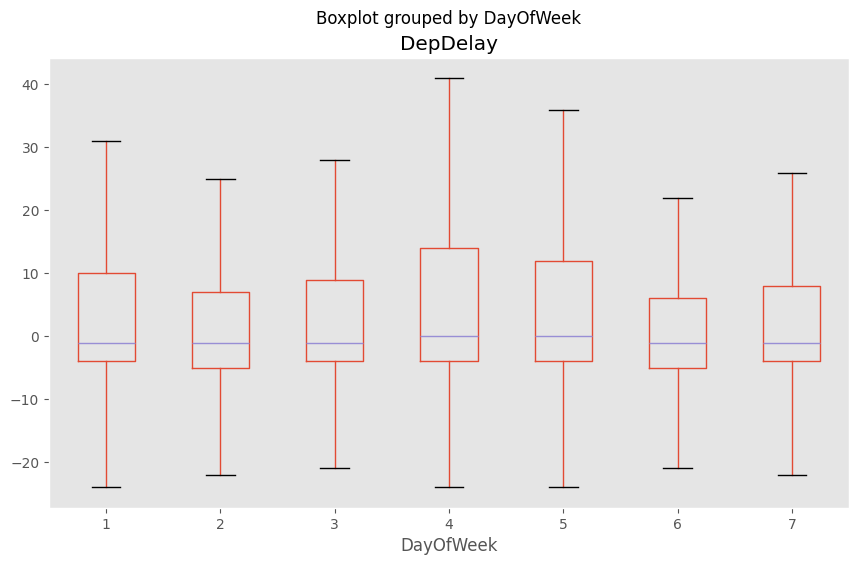

In [125]:
# Responda aqui ...
flight_df_limpo.boxplot(column='DepDelay', by='DayOfWeek', grid=False, showfliers=False)

**Exercício 1.6** Correlacione o atraso de saída com o atraso de chegada!

    Dica, remova os voos cancelados

Text(0, 0.5, 'Chegada')

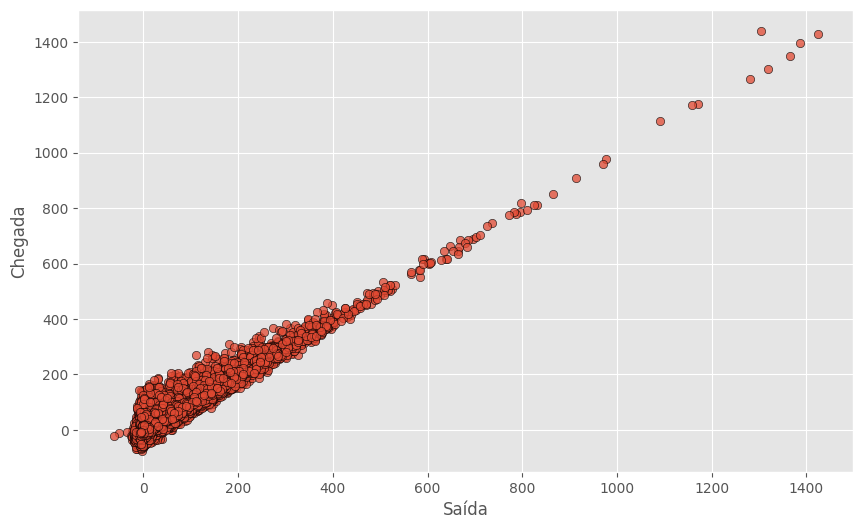

In [126]:
# Responda aqui ...
flight_cancelled = flight_df_limpo[flight_df_limpo['Cancelled'] == 0]
plt.scatter(flight_cancelled.DepDelay, flight_cancelled.ArrDelay, edgecolor='k', alpha=0.75)
plt.xlabel('Saída')
plt.ylabel('Chegada')

## 2. Aplicativos da Google Play Store 📲

Neste problema, praticaremos manipulações de DataFrame e visualizações de dados, enquanto exploramos o [Google Play Store Apps Dataset](https://www.kaggle.com/lava18/google-play-store-apps), extraído da Google Play Store.

In [127]:
apps = pd.read_csv('https://raw.githubusercontent.com/flaviovdf/icd-bradesco/refs/heads/main/labs/lab02/data/googleplaystore.csv')
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10820,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0,Everyone,Education
10821,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0,Everyone,Education
10822,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000.0,Free,0,Everyone,Medical
10823,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0,Mature 17+,Books & Reference


Cada linha no DataFrame corresponde a um aplicativo. Aqui estão as descrições de algumas das colunas.
- `'Category'`: Categoria à qual o aplicativo pertence.
- `'Rating'`: Avaliação geral do usuário do aplicativo em 5 (no momento da recuperação de dados).
- `'Reviews'`: Número de avaliações de usuários sobre o aplicativo (no momento da recuperação dos dados).
- `'Installs'`: ​​Número de downloads/instalações do usuário para o aplicativo (no momento da recuperação dos dados).
- `'Content Rating'`: Público-alvo do aplicativo, como "Todos" ou "Adolescentes".

⚠️ Observe que `'Rating'` e `'Content Rating'` significam coisas diferentes. Não os confunda!

Observe que não definimos o índice do DataFrame, embora pareça que o nome do aplicativo seria um bom candidato. Mas os nomes dos aplicativos não são exclusivos! Podemos verificar isso com a ajuda do método Series `.unique()`. Quando chamado em uma Série, este método retorna um array de todos os valores distintos da Série, sem duplicatas.

Vemos acima que o DataFrame possui 10.825 linhas. Isso significa que existem 10.825 aplicativos no conjunto de dados. Mas vamos calcular quantos nomes de aplicativos exclusivos existem:

In [128]:
len(apps.get('App').unique())

9644

Como $9644 <10825$, deve haver duplicatas!

Como existem duplicatas, o nome do aplicativo não é um bom rótulo de linha. Na verdade, não existe um bom rótulo de linha neste caso. Em situações como essa, deixaremos o índice como está.

**Pergunta 1.1.** Você pode pensar que, em uma escala de 1 a 5, um aplicativo intermediário típico deveria ter uma classificação de cerca de 3.
Faça um histograma da coluna `'Rating'` para ver se é esse o caso.

Text(0.5, 1.0, 'Distribuição do Rating')

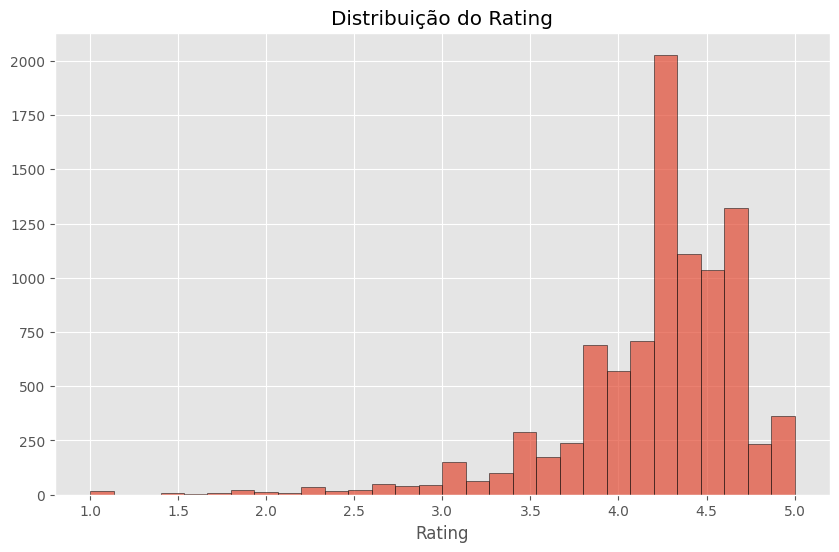

In [129]:
# Crie o histograma aqui.
...##bins = auto
import matplotlib.pyplot as plt

plt.hist(apps['Rating'], bins=30, edgecolor='k', alpha=0.7 )
plt.xlabel('Rating')
plt.title('Distribuição do Rating')

Certamente parece haver muitos aplicativos excelentes por aí! Seria interessante ver se os aplicativos com classificações mais altas também têm mais avaliações.

**Pergunta 1.2.** Que tipo de gráfico você gostaria de criar para ajudar a determinar se os aplicativos com classificação mais alta também têm mais avaliações? Atribua 1, 2, 3 ou 4 ao nome `plot_type` abaixo.
Dica: Há mais que uma resposta possível

1. gráfico de dispersão
2. gráfico de linha
3. gráfico de barras
4. histograma

In [130]:
#plot_type = 1



**Pergunta 1.3.** Agora crie o gráfico identificado acima para ajudá-lo a determinar se os aplicativos com classificação mais alta também têm mais avaliações.

<!--
COMEÇAR PERGUNTA
nome: q1_3
-->

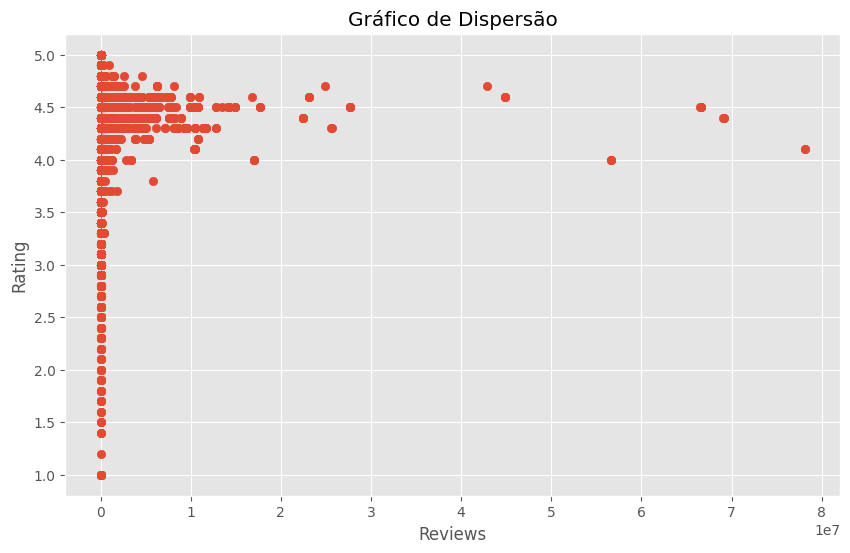

In [131]:
# Crie seu plot aqui.
plt.scatter(apps['Reviews'], apps['Rating'])
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.title('Gráfico de Dispersão')
plt.show()

**Pergunta 1.4.** Qual das seguintes afirmações podemos concluir, com base nestes dados? Atribua 1, 2, 3 ou 4 ao nome `plot_conclusion` abaixo.

1. Os aplicativos com classificações mais altas tornam-se mais populares e, como mais pessoas estão usando esses aplicativos, mais avaliações são fornecidas.
2. Os aplicativos com mais avaliações tornam-se mais populares e, como mais pessoas estão usando esses aplicativos, são atribuídas classificações mais altas.
3. 1 e 2.
4. Nem 1 nem 2.

In [132]:
plot_conclusion = 1

**Pergunta 1.5.** Atribua o nome `by_content` a um DataFrame que conte o número de aplicativos por `'Content Rating'`, indexados por `'Content Rating'`.

*Dica*: Para manter apenas certas colunas em um DataFrame, chame `.get` com uma lista de nomes de colunas que você deseja manter.

In [133]:
by_content = apps.groupby('Content Rating').size()
by_content

,0
Content Rating,
Adults only 18+,3
Everyone,8702
Everyone 10+,413
Mature 17+,499
Teen,1206
Unrated,2


**Pergunta 1.6.** Crie um DataFrame chamado `install_stats` que possui uma única coluna, `'Installs'`, que contém o número médio de `'Installs'` para cada tipo de classificação de conteúdo. Não há problema se as respostas forem exibidas em notação científica.

In [134]:
install_stats = apps.groupby('Content Rating')['Installs'].mean()
install_stats

,Installs
Content Rating,
Adults only 18+,6.666667e+05
Everyone,1.311844e+07
Everyone 10+,3.204330e+07
Mature 17+,1.107112e+07
Teen,2.878636e+07
Unrated,2.525000e+04


**Pergunta 1.7.** Crie um DataFrame chamado `top_communication_apps_by_content_rating` que contenha, para cada `'Content Rating'` único, o número de aplicativos que atendem a ambas as condições:

- `'Category'` é `'COMMUNICATION'`.
- `'Rating'` está entre 4 e 5 (inclusive).

A estrutura de `top_communication_apps_by_content_rating` deve ser a seguinte:

- Deve ter apenas uma coluna, `'Top_Comm_Apps'`.
- Deve ser ordenado por `'Top_Comm_Apps'` em ordem decrescente.

*Dica:* Você pode fazer isso como quiser, mas uma maneira de proceder é:

1. Criar um único DataFrame que contenha apenas as linhas que correspondam às condições especificadas
2. Chamar a função `groupby` no DataFrame obtido anteriormente.
3. Ordenar o DataFrame da etapa 2, além de usar as funções `assign` e `drop` para renomear a coluna `'App'` para `'Top_Comm_Apps'`.

In [135]:
filtro = apps[(apps['Category'] == 'COMMUNICATION') & (apps['Rating'] > 4) & (apps['Rating'] <= 5)]

top_communication_apps_by_content_rating = (
    filtro.groupby('Category').size()
    .reset_index(name='Top_Comm_Apps')
    .sort_values(by='Top_Comm_Apps', ascending=False))

top_communication_apps_by_content_rating

,Category,Top_Comm_Apps
0,COMMUNICATION,239


**Pergunta 1.8.** Suponha que um bom aplicativo seja aquele com pelo menos um milhão de instalações e uma classificação de pelo menos 4,0. Crie uma variável chamada `best_category` contendo o nome da categoria com o maior número de aplicativos bons.

_Nota:_ Sua resposta deve ser gerada usando código – não codificando uma string! (Em outras palavras, não escreva `best_category = "DATING"` se você acha que essa é a melhor categoria).

In [136]:
melhores_apps = apps[(apps['Installs'] >= 1_000_000) & (apps['Rating'] >= 4.0)]
grupo = melhores_apps.groupby('Category').size()
best_category = grupo.idxmax()
best_category

'GAME'

**Pergunta 1.9.** Faça um gráfico de barras da classificação média por categoria em que as barras são classificadas da menor para a maior.


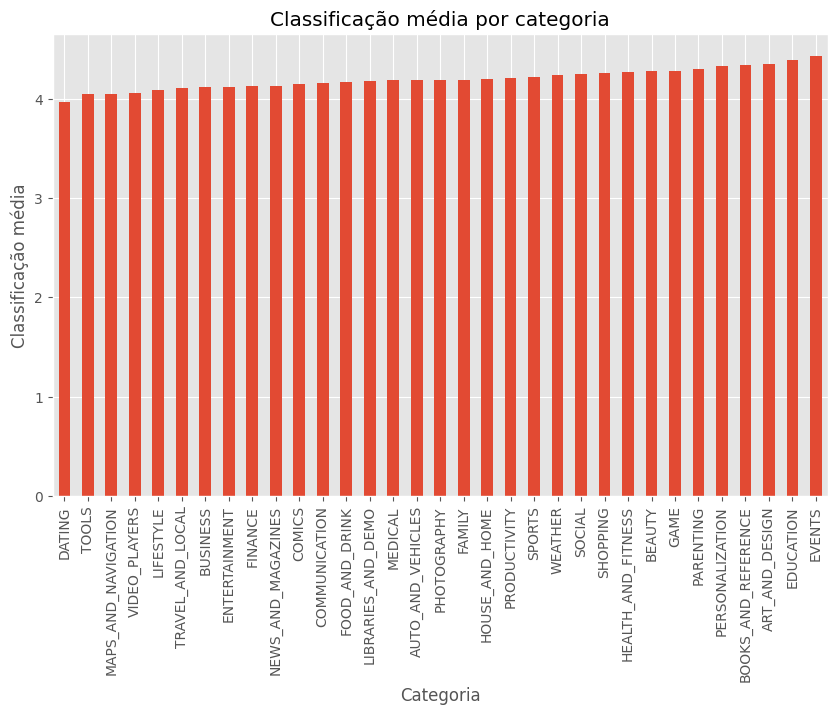

In [137]:
# Crie seu gráfico de barras verticais aqui.
media_rating = apps.groupby('Category')['Rating'].mean().sort_values()

plt.figure(figsize=(10,6))
media_rating.plot(kind='bar')

plt.title('Classificação média por categoria')
plt.xlabel('Categoria')
plt.ylabel('Classificação média')
plt.show()

## 3. Renda dos CEOs 💼

No restante deste laboratório, veremos a remuneração de 2015 dos Diretores Executivos (CEOs) das 100 maiores empresas da Califórnia. Os dados foram compilados para uma análise do [Los Angeles Times ](http://spreadsheets.latimes.com/california-ceo-compensation/) e, em última análise, vieram [daqui](http://spreadsheets.latimes.com/california-ceo-compensation/), exigido pela Comissão de Valores Mobiliários dos EUA, de todas as empresas de capital aberto. Duas das empresas em nosso conjunto de dados têm dois CEOs, portanto há 102 CEOs no conjunto de dados.

Copiamos os dados da página do LA Times para um arquivo chamado `raw_compensation.csv`. A página observa que todos os valores em dólares estão em milhões de dólares.

In [138]:
raw_compensation = pd.read_csv('https://raw.githubusercontent.com/flaviovdf/icd-bradesco/refs/heads/main/labs/lab02/data/raw_compensation.csv').set_index('Rank')
raw_compensation

,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay
Rank,,,,,,,,
1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362.00000
2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362.00000
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477.00000
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342.00000
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338.00000
...,...,...,...,...,...,...,...,...
98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),$0.94,-11%,$0.93,$0.00,$0.02,17.00000
99,Jose L. Laparte,PriceSmart (San Diego),$0.81,-7%,$0.71,$0.00,$0.10,32.00000
100,Jack Dorsey,Twitter (San Francisco),$0.07,(No previous year),$0.00,$0.00,$0.07,0.63000


Queremos trabalhar com os valores de remuneração como tipos númericos(float), entretanto tais valores estão representados por strings em formatas como moeda. Podemos, portanto, definir uma função que realize um preprocessamento que transforme essas strings em floats.

In [139]:
def currency_to_number(column):
  return column.str.replace('$','').astype(float)

Para aplicar a função às colunas(series) podemos utilizar o método apply do dataframe

In [140]:
example_df = raw_compensation.get(['Total Pay']).apply(currency_to_number)

Aqui está uma ilustração do que isso fez:

<img src="https://raw.githubusercontent.com/dsc-courses/dsc10-2023-wi/main/labs/lab02/data/apply.png" width=700/>

Observe que não escrevemos algo como `convert_pay_string_to_number()` ou `convert_pay_string_to_number("Total Pay")`. A função de `apply` é chamar a função que atribuímos a ele, então, em vez de chamarmos nós mesmos `convert_pay_string_to_number`, apenas escrevemos seu nome como um argumento para `apply`.


**Pergunta 5.1.** Usando `apply`, faça um DataFrame que seja uma cópia de `raw_compensation` tal que as colunas numéricas que representam moeda são transformadas de string em número. Chame o novo DataFrame de `compensation_df`.

Dica: Use a função definida acima como argumento para o .apply

In [141]:
# Coloque seu código aqui
# ...
compensation_df = raw_compensation.get(['Total Pay', 'Cash Pay',	'Equity Pay',	'Other Pay']).apply(currency_to_number)
compensation_df

,Total Pay,Cash Pay,Equity Pay,Other Pay
Rank,,,,
1,53.25,0.95,52.27,0.02
2,53.24,0.95,52.27,0.02
3,44.91,24.89,17.28,2.74
4,35.98,1.00,34.43,0.55
5,33.36,4.65,27.26,1.45
...,...,...,...,...
98,0.94,0.93,0.00,0.02
99,0.81,0.71,0.00,0.10
100,0.07,0.00,0.00,0.07


Agora que temos o pagamento em números, podemos realizar operações aritméticas (e, como resultado, calcular resumos numéricos) sobre os valores dos salários.

**Pergunta 5.2.** Calcule o salário total médio dos CEOs no conjunto de dados.

In [142]:
# Coloque seu código aqui
salarios = compensation_df['Total Pay'].mean()
salarios

np.float64(11.445294117647055)

Podemos, facilmente, obter estatísticas agregadas sobre as variáveis numéricas de interesse

In [143]:
example_df.describe()

,Total Pay
count,102.000000
mean,11.445294
std,9.292501
min,0.000000
25%,6.245000
50%,9.910000
75%,14.347500
max,53.250000


Entretanto, estatísticas agregadas, muitas vezes, não são capazes de "contar toda a história" (Você entraria em uma piscina com profundidade média de 50cm?). Nesses casos, vale usar um *histograma de densidade* para exibir mais informações sobre um conjunto de números. [Aqui está um exemplo](https://dsc10.com/resources/lectures/lec07/lec07.html#Plotting-a-density-histogram) do código que usamos para criar histogramas.

**Questão 5.3.** Faça um histograma de densidade da remuneração dos CEOs em `compensation`.

Text(0.5, 1.0, 'Distribuicão de densidade da remuneração dos CEOs')

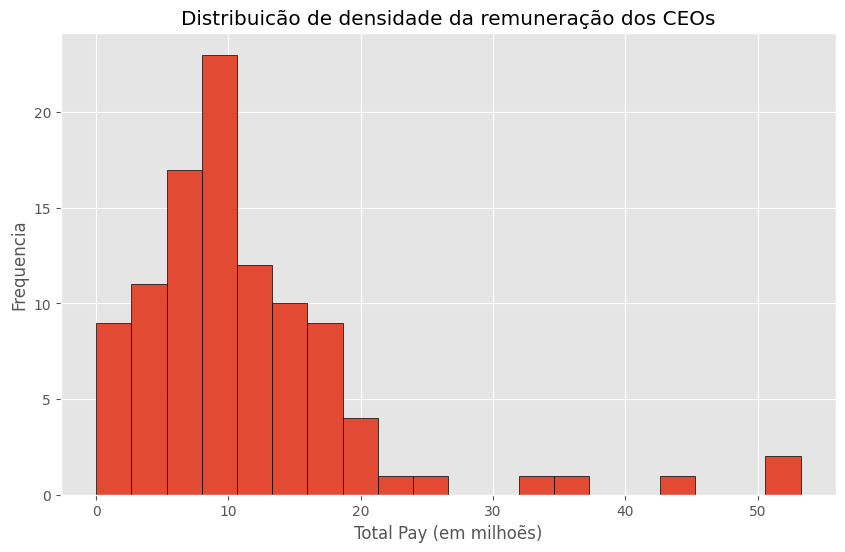

In [144]:
# Coloque seu código aqui
# ...
plt.hist(compensation_df['Total Pay'], bins=20, edgecolor='k')
plt.xlabel('Total Pay (em milhoẽs)')
plt.ylabel('Frequencia')
plt.title('Distribuicão de densidade da remuneração dos CEOs')

**Pergunta 5.4.** Olhando para o histograma, quantos CEOs ganharam mais de \$30 milhões? Faça um bom palpite. (Responda à pergunta preenchendo sua resposta manualmente. Você terá que fazer um pouco de aritmética; sinta-se à vontade para usar Python como calculadora.)

In [145]:
#num_ceos_more_than_30_million =

# Apenas eu diria que entre 4 e 7 CEOs ganharam mais de 30 milhões

**Pergunta 5.5.** Responda a mesma pergunta com código. Ou seja, encontre o número de CEOs com um salário total superior a \$30 milhões usando código e atribua o resultado ao nome `num_ceos_more_than_30_million_code`.

In [146]:
num_ceos_more_than_30_million_code = compensation_df['Total Pay'] > 30.0
compensation_df.groupby(num_ceos_more_than_30_million_code)['Total Pay'].describe()


,count,mean,std,min,25%,50%,75%,max
Total Pay,,,,,,,,
False,97.0,9.759588,5.351450,0.00,5.92,9.42,13.67,24.84
True,5.0,44.148000,9.343295,33.36,35.98,44.91,53.24,53.25


# Linha de chegada 🏁

Parabéns! Você concluiu o Laboratório 2.

Para enviar sua tarefa:

1. Selecione `Runtime -> Restart session and run all` para garantir que você executou todas as células, incluindo as células de teste.
2. Confira se suas respostas coincidem com o gabarito.